## Goal: Data Format
User Profiles Data
- Demographic information (age, gender, location)
- user preference and settings

Listening History
- Historical data on songs, albums, or artists a user has listened to
- Timestamps of when the user interacted with specific content

Playlist Data
- information about playlists created by user
- playlists the user follows

Audio Features
- Features describing audio characteristics of songs (danceability, energy, tempo)

User Interactions
- Likes, dislikes, skips
- ratings or reviews provided by user

In [2]:
#pip install spotipy
import pandas as pd

In [3]:
df_2 = pd.read_csv('spotify_dataset.csv', on_bad_lines='skip')
df_2

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [4]:
df = df_2.copy()
df.isnull().sum()

user_id                0
 "artistname"      33572
 "trackname"          88
 "playlistname"     1246
dtype: int64

In [5]:
df.columns = df.columns.str.replace("\"", "")
df.columns

Index(['user_id', ' artistname', ' trackname', ' playlistname'], dtype='object')

In [6]:
df[" artistname"] = df[" artistname"].fillna(df[" artistname"].mode()[0])
df[" trackname"] = df[" trackname"].fillna(df[" trackname"].mode()[0])
df[" playlistname"] = df[" playlistname"].fillna(df[" playlistname"].mode()[0])
df.rename(columns={' artistname': 'artistname', ' trackname': 'trackname', ' playlistname': 'playlistname'}, inplace=True)

In [7]:
df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


## Exploratory Data Analysis

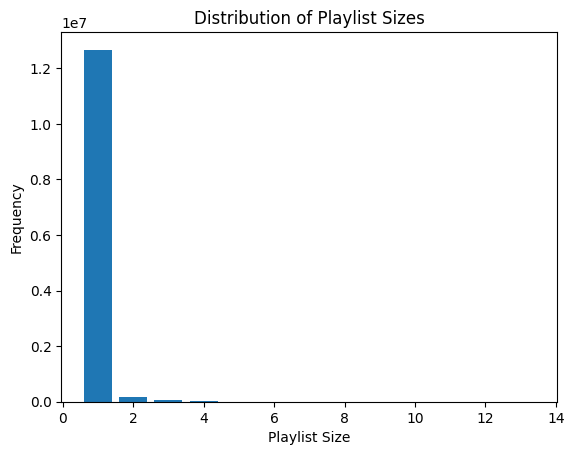

In [8]:
# Distribution of Playlist Sizes
import seaborn as sns
import matplotlib.pyplot as plt

playlist_size = df['playlistname'].apply(lambda x: len(x.split(',')))
plt.bar(playlist_size.value_counts().index, playlist_size.value_counts().values)
plt.xlabel('Playlist Size')
plt.ylabel('Frequency')
plt.title('Distribution of Playlist Sizes')
plt.show()

Majority of playlist sizes are 1, so most portion of playlists consist of single tracks

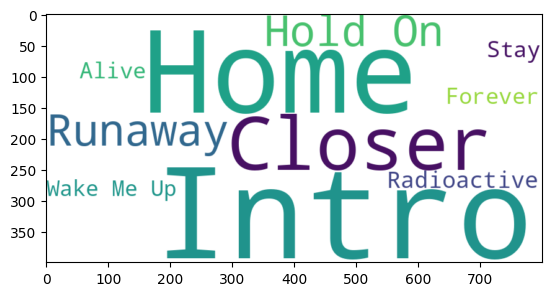

In [9]:
top_n_tracks = df['trackname'].astype(str).value_counts().head(10)
from wordcloud import WordCloud
wordcloud_data = dict(zip(top_n_tracks.index, top_n_tracks.values))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)
plt.imshow(wordcloud, interpolation='bilinear')

## User Segmentation

In [10]:
segmented_df = df.copy()
segmented_df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [11]:
segmented_df[['user_id', 'playlistname']].value_counts()

user_id                           playlistname     
4398de6902abde3351347b048fcdc287  Starred              47362
68756b4d60b6fac27789e85c2b63d1c6  Starred              18510
c410ee930bd5f0e4893632503ec17b05  Starred              18084
f2604a69836c94d00fcd11dd602944fc  everything           15824
6b85a8076b4f3b1036ef15f09e2feeeb  Generos              14877
                                                       ...  
013dd02e71be82ac338bf33b1cec437a  När solen går ner        1
5cf85c797d505cb8303761858bcd74ce  Recently Saved           1
013dd02e71be82ac338bf33b1cec437a  Nessun Dorma             1
52d9c19d9a0f09254af29449582346cf  Last Night               1
dd1f5cf3ceff11e4481384a3c7ba611b  Strange World            1
Name: count, Length: 232174, dtype: int64

In [12]:
segmented_df[(segmented_df['user_id'] == '4398de6902abde3351347b048fcdc287') & (segmented_df['playlistname'] == 'Starred')]

,user_id,artistname,trackname,playlistname
6639902,4398de6902abde3351347b048fcdc287,The Gaslight Anthem,"45""""",Starred
6639903,4398de6902abde3351347b048fcdc287,Rebekka Karijord,"I´ve Always Been Jealous of Migratory Birds""""",Starred
6639904,4398de6902abde3351347b048fcdc287,Mutual Benefit,"Let's Play"" / Statue of a Man""",Starred
6639905,4398de6902abde3351347b048fcdc287,Lucius,"Turn It Around""- Spotify Sessions Curated by J...",Starred
6639906,4398de6902abde3351347b048fcdc287,Shakey Graves,"Unlucky Skin"" - Live from Spotify Nyc""",Starred
...,...,...,...,...
6687259,4398de6902abde3351347b048fcdc287,Raised By Swans,Öxnadalur,Starred
6687260,4398de6902abde3351347b048fcdc287,Victor Villarreal,“That Familiar Band” Song,Starred
6687261,4398de6902abde3351347b048fcdc287,Ryan Hemsworth,「Every Square Inch」 - With Qrion,Starred
6687262,4398de6902abde3351347b048fcdc287,Joy Wellboy,﻿Lay Down Your Blade,Starred


In [14]:
segmented_df = segmented_df.drop_duplicates(subset=['user_id', 'playlistname'])

In [16]:
# Assuming df is your DataFrame with columns user_id, playlist_name, track_name
user_item_matrix = segmented_df.groupby(['user_id', 'trackname']).size().unstack(fill_value=0)


In [17]:
user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

/var/folders/3t/t58dnlt54s5cdr1hhtxqb5hr0000gn/T/ipykernel_3543/4253252369.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x > 0 else 0)


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarities = cosine_similarity(user_item_matrix.T)
item_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
track_similarity_df = pd.DataFrame(item_similarities, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [20]:
track_similarity_df

trackname,""" (Acoustical ) by Everclear""",15 Years of Tummy Touch Records in Dub,Da,Daedelus - Looking Ocean Ep,"Dios Te Bendiga """"",Episode 22,History O,"Jewel "" Taking Refuge In The Three Jewels""",New Wave,"R.I.P """"",...,他夏了夏天 - Live,凡人的告白書,可愛女人,嘻嘻哈哈過新年,憨阿嬤,虚無の終わり 箱詰めの黙示,虹の彼方 (Kneeeeee Remix),꽃,﻿Before The Sunrise,🐯🐯🐯🐯
trackname,,,,,,,,,,,,,,,,,,,,,
""" (Acoustical ) by Everclear""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Years of Tummy Touch Records in Dub,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Da,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daedelus - Looking Ocean Ep,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dios Te Bendiga """"",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虚無の終わり 箱詰めの黙示,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
虹の彼方 (Kneeeeee Remix),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
꽃,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
track_similarity_df.index.name = None
track_similarity_df

,""" (Acoustical ) by Everclear""",15 Years of Tummy Touch Records in Dub,Da,Daedelus - Looking Ocean Ep,"Dios Te Bendiga """"",Episode 22,History O,"Jewel "" Taking Refuge In The Three Jewels""",New Wave,"R.I.P """"",...,他夏了夏天 - Live,凡人的告白書,可愛女人,嘻嘻哈哈過新年,憨阿嬤,虚無の終わり 箱詰めの黙示,虹の彼方 (Kneeeeee Remix),꽃,﻿Before The Sunrise,🐯🐯🐯🐯
""" (Acoustical ) by Everclear""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Years of Tummy Touch Records in Dub,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Da,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daedelus - Looking Ocean Ep,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dios Te Bendiga """"",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虚無の終わり 箱詰めの黙示,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
虹の彼方 (Kneeeeee Remix),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
꽃,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
﻿Before The Sunrise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
track_similarity_df.columns

Index(['            "  (Acoustical ) by Everclear"',
       ' 15 Years of Tummy Touch Records in Dub', ' Da',
       ' Daedelus - Looking Ocean Ep', ' Dios Te Bendiga ""', ' Episode 22',
       ' History O', ' Jewel " Taking Refuge In The Three Jewels"',
       ' New Wave', ' R.I.P ""',
       ...
       '他夏了夏天 - Live', '凡人的告白書', '可愛女人', '嘻嘻哈哈過新年', '憨阿嬤', '虚無の終わり 箱詰めの黙示',
       '虹の彼方 (Kneeeeee Remix)', '꽃', '﻿Before The Sunrise', '🐯🐯🐯🐯'],
      dtype='object', length=78507)

In [29]:
track_similarity_df[' History O'].sort_values(ascending=False)[1:5+1].index


Index(['A Case Of You (Joni Mitchell Cover)',
       'Big Pretty Bridges (3 Days off in Albuquerque)', 'Heart of Chambers',
       'Float On (Modest Mouse Cover)', 'Another Reason to Go'],
      dtype='object')